In [0]:
from google.colab import files
files.upload()

In [0]:
!pip install -q kaggle

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [0]:
!kaggle competitions download -c digit-recognizer

 85% 62.0M/73.2M [00:01<00:00, 20.7MB/s]
100% 73.2M/73.2M [00:01<00:00, 40.0MB/s]
 84% 41.0M/48.8M [00:00<00:00, 38.6MB/s]
100% 48.8M/48.8M [00:00<00:00, 71.2MB/s]
  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 79.5MB/s]


In [0]:
import pandas as pd
import numpy as np

In [0]:
data=pd.read_csv("/content/train.csv")
print(data.shape)
y=[]
X=[]
print(type(data))
print(data.shape)
data=data.values
for i in range(42000):
  image_array=[]
  y.append(data[i][0])
  for j in range(1,785):
    image_array.append(data[i][j])
  X.append(image_array)
print(len(X))
print(len(y))

(42000, 785)
<class 'pandas.core.frame.DataFrame'>
(42000, 785)
42000
42000


In [0]:
X=np.array(X)

In [0]:
X=X/255.0

In [0]:
x_train=[]
for i in X:
  i=i.reshape(28,28)
  x_train.append(i)
print(len(x_train))

42000


In [0]:
print(x_train[0].shape)

(28, 28)


In [0]:
import matplotlib.pyplot as py

4
(42000,)


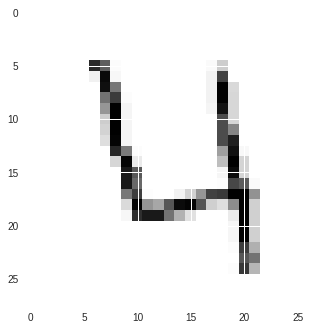

In [0]:
py.imshow(x_train[3])
print(y[3])
y=np.array(y)
y.reshape(1,42000)
print(y.shape)
x_train=np.array(x_train).reshape(-1,28,28,1)

In [0]:
import tensorflow as tf
from tensorflow.python.keras.layers.convolutional import Conv2D,MaxPooling2D
from tensorflow.python.keras.layers.core import Dense,Activation,Flatten

from tensorflow import keras
from tensorflow.python.keras.models import Sequential
#x_train=tf.keras.utils.normalize(x_train,axis=1)
#model=tf.keras.models.Sequential() #feed free model and the most common one
#model.add(tf.keras.layers.Flatten())   #input layer and also a layer is flatten as we get a one directional array same as numpy.reshape will do


x_train=np.array(x_train).reshape(-1,28,28,1)
layers=[32,64,128,256]
dense=[2,3,4,5,6,7,8]
conv_layer=[]
for layer_size in layers:
  for l in dense:
    for conv in conv_layer:
      model=Sequential()
      model.add(Conv2D(layer_size,(3,3),input_shape=x_train.shape[1:]))
      model.add(Activation("relu"))
      model.add(MaxPooling2D(pool_size=(2,2)))
      for l in range(conv-1):
        model.add(Conv2D(layer_size,(3,3)))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2,2)))

      model.add(Flatten())
      for i in range(l):
        model.add(tf.keras.layers.Dense(layer_size,activation=tf.nn.relu))   #dense layer Dense(no. of neuron ,activation function)

      model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))   #output layer(no. of classification ,activation function will be softmax as it is probability distribution)
      model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])   #we will try to set some parameters optimizer for optimization, how to calculate loss as nn always try to minimize the loss and meter of the nn
      model.fit(x_train,y,epochs=3,validation_split=0.1)
      print(str(layer_size)+'   '+str(l)+"dense"+" "+str(conv)+" convlayer")

In [0]:
import tensorflow as tf
from tensorflow.python.keras.layers.convolutional import Conv2D,MaxPooling2D
from tensorflow.python.keras.layers.core import Dense,Activation,Flatten
from tensorflow import keras
from tensorflow.python.keras.models import Sequential
model=tf.keras.models.Sequential() #feed free model and the most common one
model.add(Conv2D(64,(3,3),input_shape=x_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256,(2,2)))      
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(64,activation=tf.nn.relu)) 
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))   #output layer(no. of classification ,activation function will be softmax as it is probability distribution)
model.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])   #we will try to set some parameters optimizer for optimization, how to calculate loss as nn always try to minimize the loss and meter of the nn
model.fit(x_train,y,epochs=30,validation_split=0.1)

Train on 37800 samples, validate on 4200 samples
Epoch 1/30
37800/37800 [==============================] - 15s 405us/sample - loss: 0.1704 - acc: 0.9464 - val_loss: 0.0619 - val_acc: 0.9807
Epoch 2/30
37800/37800 [==============================] - 15s 398us/sample - loss: 0.0502 - acc: 0.9852 - val_loss: 0.0479 - val_acc: 0.9860
Epoch 3/30
37800/37800 [==============================] - 15s 389us/sample - loss: 0.0350 - acc: 0.9893 - val_loss: 0.0485 - val_acc: 0.9848
Epoch 4/30
37800/37800 [==============================] - 15s 399us/sample - loss: 0.0286 - acc: 0.9909 - val_loss: 0.0364 - val_acc: 0.9869
Epoch 5/30
37800/37800 [==============================] - 15s 401us/sample - loss: 0.0202 - acc: 0.9936 - val_loss: 0.0384 - val_acc: 0.9888
Epoch 6/30
37800/37800 [==============================] - 15s 398us/sample - loss: 0.0185 - acc: 0.9937 - val_loss: 0.0339 - val_acc: 0.9914
Epoch 7/30
37800/37800 [==============================] - 15s 402us/sample - loss: 0.0150 - acc: 0.9954 -